In [1]:
import os
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

from find_nucleus import hls_trans

In [2]:
file_name = "/home/nvme/CELLS/SC/2017-10-09-19_39_43_x35274_y34436_w56_h92.bmp"

In [3]:
img = cv2.imread(file_name)

# img = hls_trans(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
# blur = cv2.GaussianBlur(gray, (5,5), 0)
# ret3,th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

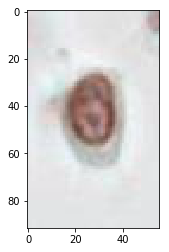

In [5]:
plt.imshow(img)

In [6]:
# plt.imshow(th3, cmap="gray")

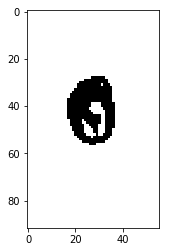

In [7]:
mask = gray > threshold_otsu(gray)/1.35
plt.imshow(mask, cmap="gray")

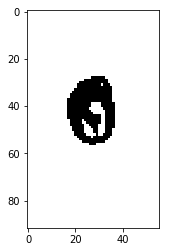

In [8]:
img2 = np.array(mask * 255, dtype=np.uint8)
plt.imshow(img2, cmap="gray")

In [9]:
img3, contours, hierarchy = cv2.findContours(img2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

(32, 1, 2)


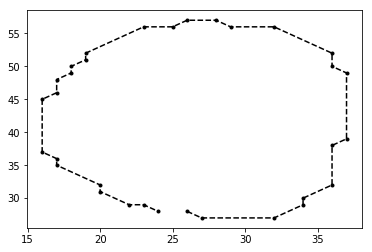

In [10]:
contour = contours[1]  # the circle coordinates we want
print(contour.shape)
xs = contour[:, 0, 0]
ys = contour[:, 0, 1]
plt.plot(xs, ys, marker='.', color='black', linestyle='dashed')

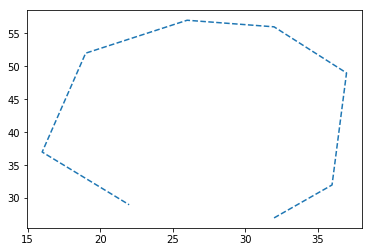

In [11]:
poly = cv2.approxPolyDP(contour, 2, True)
plt.plot(poly[:, 0, 0], poly[:, 0, 1], linestyle='dashed')

In [12]:
cv2.drawContours(img, contours, 1, (0, 0, 255), 1)
cv2.imwrite("./test.jpg", img)
# cv2.imshow("contours", img)
# cv2.waitKey(0)

area = cv2.contourArea(contour)
print(area)

503.5


In [13]:
cv2.drawContours(gray, contours, 1, (0,0,255), 1)
cv2.imwrite("./gray.jpg", gray)

area = cv2.contourArea(contours[1])
print(area)

503.5


In [14]:
mask_contour = np.zeros_like(gray)
cv2.drawContours(mask_contour, contours, 1, color=255, thickness=-1)
cv2.imwrite("./mask_contour.jpg", mask_contour)

pts = np.where(mask_contour == 255)
gray_contour = gray[pts[0], pts[1]]

In [27]:
print(gray.shape)
print(mask_contour.shape)

(92, 56)
(92, 56)


In [15]:
print(type(gray_contour), len(gray_contour), gray_contour.shape)
print(gray_contour)
print(sum(gray_contour))

<class 'numpy.ndarray'> 542 (542,)
[  0   0   0   0   0   0   0   0   0 125 122 120 115 111 123   0   0   0
 118 122 125 124 122 118 109 100  99 119   0   0 123 112 106 114 118 116
 116 118 116 112 106 111   0   0 125 107 104 108 112 111 104 104 115 125
 129 120 110 114   0   0 103  94  98 103 107 108 105 104 111 121 127 122
 110 104 118   0   0 111  90  86  92 108 111 113 109 103 103 113 123 126
 112 104 117   0   0 122 100  88  90  98 113 115 118 116 104  94 103 118
 127 114 104 115   0   0 128 111  99  93  98 105 110 113 119 119 104  89
  95 113 122 114 107 114   0   0 114 101  94  90  90  93  98 103 113 116
 105  91  93 105 116 113 110 115   0   0 128 105  94  90  86  81  80  88
  97 109 114 111 105 100  99 109 109 107 111   0   0 122  98  89  90  89
  84  80  88 102 114 120 126 128 117 101 100  97  92 100   0   0 113  89
  84  90  93  90  87  95 111 123 129 140 148 132 107  93  85  77  87 126
   0   0 108  88  84  91  96 101 105 109 117 126 136 149 155 140 120 100
  87  74  81 117

In [ ]:
kernel_size = (5, 5)
kernel = np.ones(kernel_size, np.uint8)

In [ ]:
dilation = cv2.dilate(img2, kernel, iterations=1)
plt.imshow(dilation, cmap="gray")

In [ ]:
erosion = cv2.erode(dilation, kernel, iterations=1)
plt.imshow(erosion, cmap="gray")

In [ ]:
dilation = cv2.dilate(erosion, kernel, iterations=1)
plt.imshow(dilation, cmap="gray")

In [ ]:
import os
import shutil

In [ ]:
ori = "/home/nvme/CELLS/HSIL_S-half"
mask = "/home/nvme/CELLS/HSIL_S-half-mask"
nucleus = "/home/nvme/CELLS/HSIL_S-half-nucleus"
train = "/home/nvme/CELLS/HSIL_S-half-train"

In [ ]:
nucleus_names = [os.path.splitext(f)[0] for f in os.listdir(nucleus)]
print(len(nucleus_names), nucleus_names[0])

In [ ]:
for name in nucleus_names:
    shutil.copy(ori+'/'+name+".bmp", train)
    shutil.copy(mask+'/'+name+".png", train)

In [28]:
mask = "/home/nvme/CELLS/HSIL_S-half-train/2017-09-07-09_13_16_x41018_y22139_w120_h106.png"
mask_img = cv2.imread(mask)
print(mask_img.shape)

(52, 60, 3)


In [29]:
b = mask_img[:, :, 0]
g = mask_img[:, :, 1]
r = mask_img[:, :, 2]
print(b.shape, g.shape, r.shape)

(52, 60) (52, 60) (52, 60)


In [30]:
sum(sum(b - g))

0

In [31]:
sum(sum(b - r))

0